## Data Preparation From Scratch

In [1]:
import pandas as pd
import cv2
import random

In [7]:
import os

path = os.getcwd()

# path to the data folder
data_path = 'C:\\Users\\91800\\Desktop\\project1\\flowers'
#data_dir = 'daisy'
data_dir_list = os.listdir(os.path.join(data_path))

for data_dir in data_dir_list:
    print ('Renaming files from folder: {}'.format(data_dir))
    data_list = os.listdir(os.path.join(data_path,data_dir))
    os.chdir(os.path.join(data_path,data_dir))

    # The base name of image files
    base_name=data_dir
    
    for i in range(len(data_list)):
        img_name = data_list[i]
#        img_rename = base_name + '_{}'.format(i+1)+'.png' # here the file name is base_name_1.png
        img_rename = base_name + '_{:06d}'.format(i+1)+'.png' # here the file name is base_name_000001.png
        if not os.path.exists(img_rename):
            os.rename(img_name,img_rename)
        
    print ('------Complete renaming all folders: {}------'.format(data_dir))

    os.chdir(path)

print ('----Complete renaming files from all folders----')


Renaming files from folder: daisy
------Complete renaming all folders: daisy------
Renaming files from folder: dandelion
------Complete renaming all folders: dandelion------
Renaming files from folder: flowers
------Complete renaming all folders: flowers------
Renaming files from folder: rose
------Complete renaming all folders: rose------
Renaming files from folder: sunflower
------Complete renaming all folders: sunflower------
Renaming files from folder: tulip
------Complete renaming all folders: tulip------
----Complete renaming files from all folders----


In [10]:
data_path = 'C:\\Users\\91800\\Desktop\\project1\\flowers'
#data_path = os.path.join(root_dir,data_folder)
data_dir_list = os.listdir(data_path)
print ('the data list is: ',data_dir_list)

the data list is:  ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [11]:
# Assigning labels to each flower category
num_classes = 5
labels_name={'daisy':0,'dandelion':1,'rose':2,'sunflower':3,'tulip':4}

In [18]:
# create two dataframes one for train and other for test with 3 columns as filename,label and classname
train_df = pd.DataFrame(columns=['FileName', 'Label', 'ClassName'])
test_df = pd.DataFrame(columns=['FileName', 'Label', 'ClassName'])

#number of images to take for test data from each flower category
num_images_for_test = 60

# Here data_dir_list = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
# Loop over every flower category
for dataset in data_dir_list:
    # load the list of image names in each of the flower category
    img_list = os.listdir(os.path.join(data_path,dataset))
    print ('Loading the images of dataset-'+'{}\n'.format(dataset))
    label = labels_name[dataset]
    num_img_files = len(img_list)
    num_corrupted_files=0
    test_list_index = random.sample(range(1, num_img_files-1), num_images_for_test)
    
    # read each file and if it is corrupted exclude it , if not include it in either train or test data frames
    for i in range(num_img_files):
        img_name = img_list[i]
        img_filename = os.path.join(data_path,dataset,img_name)
        try:
            input_img = cv2.imread(img_filename)
            img_shape=input_img.shape
            if i in test_list_index:
                test_df = test_df.append({'FileName': img_filename, 'Label': label,'ClassName': dataset},ignore_index=True)
            else:
                train_df = train_df.append({'FileName': img_filename, 'Label': label,'ClassName': dataset},ignore_index=True)       
        except:
            print ('{} is corrupted\n'.format(img_filename))
            num_corrupted_files+=1
    
    
    
    print ('Read {0} images out of {1} images from data dir {2}\n'.format(num_img_files-num_corrupted_files,num_img_files,dataset))

print ('completed reading all the image files and assigned labels accordingly')

Loading the images of dataset-daisy

Read 769 images out of 769 images from data dir daisy

Loading the images of dataset-dandelion

C:\Users\91800\Desktop\project1\flowers\dandelion\dandelion_001053.png is corrupted

C:\Users\91800\Desktop\project1\flowers\dandelion\dandelion_001054.png is corrupted

C:\Users\91800\Desktop\project1\flowers\dandelion\dandelion_001055.png is corrupted

Read 1052 images out of 1055 images from data dir dandelion

Loading the images of dataset-rose

Read 784 images out of 784 images from data dir rose

Loading the images of dataset-sunflower

Read 734 images out of 734 images from data dir sunflower

Loading the images of dataset-tulip

Read 984 images out of 984 images from data dir tulip

completed reading all the image files and assigned labels accordingly


## Saving Data Prepared in csv Format

In [43]:
if not os.path.exists('data_files'):
    os.mkdir('data_files')

train_df.to_csv('data_files/flowers_recognition_train.csv')
test_df.to_csv('data_files/flowers_recognition_test.csv')
print('The train and test csv files are saved')

The train and test csv files are saved


## Loading Data

In [2]:
import os 
import cv2
import random
import pandas as pd
import numpy as np
import keras 
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Activation, MaxPooling2D, Dropout

Using TensorFlow backend.


In [3]:
def load_samples(csv_file):
    data = pd.read_csv(os.path.join('D:/project1/data_files',csv_file))
    data = data[['FileName', 'Label', 'ClassName']]
    file_names = list(data.iloc[:,0])
    # Get the labels present in the second column
    labels = list(data.iloc[:,1])
    samples=[]
    for samp,lab in zip(file_names,labels):
        samples.append([samp,lab])
    return samples
train_samples = load_samples('flowers_recognition_train.csv')
validation_samples = load_samples('flowers_recognition_test.csv')

## Data Visualization

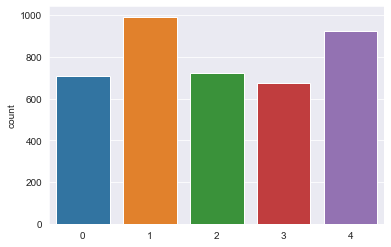

In [61]:
l = []
labels = [label for i, label in train_samples]
for i in labels:
    l.append(i)
sns.set_style('darkgrid')
sns.countplot(l)

## Method 1 : Using keras Generator and Data Augmentation

In [53]:
def function1(samples,resize =224):
    X_train = []
    y_train = []
    for sample in samples:
        img_name = sample[0]
        label = sample[1]
        img =  cv2.imread(img_name)
        img = cv2.resize(img,(resize,resize))

        X_train.append(img)
        y_train.append(label)
    y_train = keras.utils.to_categorical(y_train)
    return np.array(X_train),y_train



In [54]:
x_train,y_train = function1(train_samples)
x_test,y_test = function1(validation_samples)

In [55]:
# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [ ]:
batch_size=128
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.1)

In [ ]:
datagen = keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size, workers = -1)

### Model saving

In [ ]:
model.save('D:/project1/data_files/first_try.h5')

## Model performation visualization

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

## Visualize the model architecture with detail

In [58]:
import netron
netron.start('D:/project1/data_files/Second_try.h5', port=8081)


Stopping http://localhost:8081
Serving 'D:/project1/data_files/Second_try.h5' at http://localhost:8081


### Method  2: Using Self Created Generator 

In [4]:
def shuffle(samples):
    return random.shuffle(samples)
def generator(samples, batch_size=32,shuffle_data=True,resize=224):
    num_samples = len(samples)
    while True: 
        shuffle(samples)

        for offset in range(0, num_samples, batch_size):
            batch_samples = samples[offset:offset+batch_size]

            X_train = []
            y_train = []

            for batch_sample in batch_samples:
                img_name = batch_sample[0]
                label = batch_sample[1]
                img =  cv2.imread(img_name)
                img = cv2.resize(img,(resize,resize))
    
                X_train.append(img)
                y_train.append(label)

            X_train = np.array(X_train)
            y_train = keras.utils.to_categorical(y_train)
            
            yield X_train, y_train


(32, 224, 224, 3)
[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


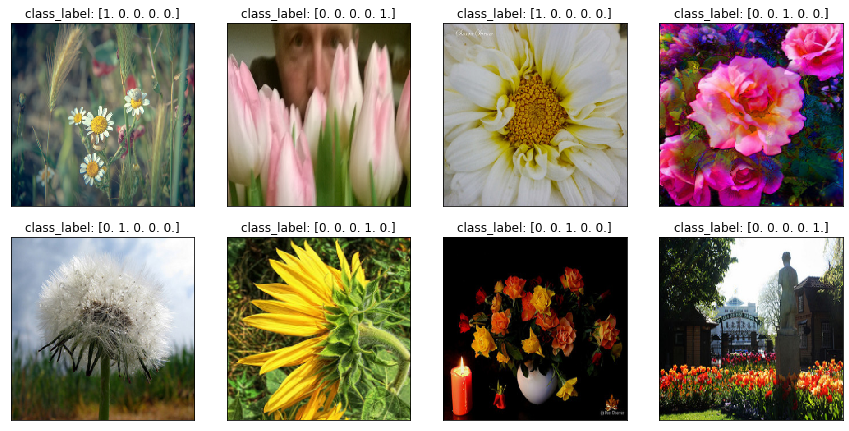

In [5]:
train_generator = generator(train_samples,batch_size=32,shuffle_data=True)
validation_generator = generator(validation_samples, batch_size=32)
x,y = next(train_generator)
print (x.shape)
print (y)

import matplotlib.pyplot as plt
fig = plt.figure(1,figsize=(12,12))
for i in range(8):
    plt.subplot(4,4,i+1)
    plt.tight_layout()
    x[i] = x[i][:,:,::-1]
    plt.imshow(x[i], interpolation='none')
    plt.title("class_label: {}".format(y[i]))
    plt.xticks([])
    plt.yticks([])


In [6]:
class Config():
    def __init__(self):
        pass
    
    num_classes=5
    labels_to_class = {0:'daisy',1:'dandelion',2:'rose',3:'sunflower',4:'tulip'}
    class_to_labels = {'daisy':0,'dandelion':1,'rose':2,'sunflower':3,'tulip':4}
    resize = 224
    num_epochs =32
    batch_size =10
num_train_samples = len(train_samples)
num_test_samples = len(validation_samples)
    
print ('number of train samples: ', num_train_samples)
print ('number of test samples: ', num_test_samples) 

number of train samples:  4023
number of test samples:  300


In [7]:
input_shape = (Config.resize,Config.resize,3)
print (input_shape)
model = Sequential()
model.add(Conv2D(32, (3,3),padding='same',input_shape=input_shape,name='conv2d_1'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),name='maxpool2d_1'))
model.add(Conv2D(32, (3, 3),name='conv2d_2'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),name='maxpool2d_2'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


(224, 224, 3)


In [ ]:
batch_size =10
callbacks = [
             keras.callbacks.EarlyStopping(verbose=True, patience=5, monitor='val_accuracy')
]
hist=model.fit_generator(
        train_generator,
        steps_per_epoch=num_train_samples // batch_size,
        epochs=Config.num_epochs,callbacks=callbacks,
        validation_data=validation_generator,
        validation_steps=num_test_samples // batch_size +1)

Epoch 1/32
 67/402 [====>.........................] - ETA: 6:29 - loss: 44.4132 - accuracy: 0.2243

In [ ]:
 model.save('D:/project1/data_files/first_try.h5')